In [1]:
#This section is for Google Colab use.

#from google.colab import drive
#drive.mount('/content/drive')

# Introduction

In this project, by using data mining and machine learning methods, we tried to design a system to predict diabetes.
The data whose link is given below was used to build the models.
The data selection method was logistic regression algorithm which was implemented through RFE.


Dataset from : https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey

# Starting (Getting data &  Preprocessing‌)

First, we import some required libraries.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy


Some warnings cause clutter in our environment that we ignore them.

In [3]:
import warnings
warnings.filterwarnings('ignore')

Then we read our data with pandas structure.

In [4]:
dataset1 = pd.read_csv('NHANES.csv')

**Check the data structure**

In [5]:
dataset1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10000 non-null  int64  
 1   ID                10000 non-null  int64  
 2   SurveyYr          10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   AgeDecade         9667 non-null   object 
 6   AgeMonths         4962 non-null   float64
 7   Race1             10000 non-null  object 
 8   Race3             5000 non-null   object 
 9   Education         7221 non-null   object 
 10  MaritalStatus     7231 non-null   object 
 11  HHIncome          9189 non-null   object 
 12  HHIncomeMid       9189 non-null   float64
 13  Poverty           9274 non-null   float64
 14  HomeRooms         9931 non-null   float64
 15  HomeOwn           9937 non-null   object 
 16  Work              7771 non-null   object 

**Data cleaning and dimensionality reduction**

Here we see that some of our records have undefined values. We have different ways to standardize here. As a solution, we can completely remove those rows so that the data we want to use for various purposes is standardized Or we can replace them with mean or median.

We give a brief overview of the structure of our data set:

In [6]:
dataset1.isnull().sum()

Unnamed: 0            0
ID                    0
SurveyYr              0
Gender                0
Age                   0
                   ... 
SexAge             4460
SexNumPartnLife    4275
SameSex            4232
SexOrientation     5158
PregnantNow        8304
Length: 76, dtype: int64

In [7]:
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4999.500000,2886.895680,0.00,2499.750,4999.500,7499.250,9999.000
ID,10000.0,61944.643800,5871.167160,51624.00,56904.500,62159.500,67039.000,71915.000
Age,10000.0,36.742100,22.397566,0.00,17.000,36.000,54.000,80.000
AgeMonths,4962.0,420.123942,259.043091,0.00,199.000,418.000,624.000,959.000
HHIncomeMid,9189.0,57206.170421,33020.276584,2500.00,30000.000,50000.000,87500.000,100000.000
Poverty,9274.0,2.801844,1.677909,0.00,1.240,2.700,4.710,5.000
HomeRooms,9931.0,6.248918,2.277538,1.00,5.000,6.000,8.000,13.000
Weight,9922.0,70.981798,29.125357,2.80,56.100,72.700,88.900,230.700
Length,543.0,85.016022,13.705026,47.10,75.700,87.000,96.100,112.200
HeadCirc,88.0,41.180682,2.311483,34.20,39.575,41.450,42.925,45.400


Of course, we should know that NaN values in the Diabetes column are not useful for us. Because this is our dependent variable. So we delete the rows in which diabetes has no value.



In [8]:
dataset1 = dataset1.dropna(subset=['Diabetes'])

One of the ways to reduce the data dimensions and clean the data is to remove the columns that we do not need:

In [9]:

dataset1 = dataset1.drop('HeadCirc', axis=1)
dataset1 = dataset1.drop('BMICatUnder20yrs', axis=1)
dataset1 = dataset1.drop('SurveyYr', axis=1)
dataset1 = dataset1.drop('ID', axis=1)
dataset1 = dataset1.drop('Smoke100', axis=1)

We also use their mode for discrete values.

In [10]:
# Impute NaN values with mode 
categorical_cols = dataset1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode = dataset1[col].mode()[0]
    dataset1[col] = dataset1[col].fillna(mode)

Now we replace other columns with undefined values with the average values of those columns.

In [11]:
# Impute NaN values with mean 
continuous_cols = dataset1.select_dtypes(include=np.number).columns
dataset1[continuous_cols] = dataset1[continuous_cols].fillna(dataset1[continuous_cols].mean())

We check again whether we have a column with an undefined value or not:

In [12]:
nan_mask = dataset1.isna()
columns_with_nan = nan_mask.any()
columns_names = columns_with_nan[columns_with_nan].index.tolist()
#dataset_new=dataset1

print(columns_names)

[]


**Feature selection**

Now, using RFE in sklearn, we start the feature selection operation.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



We define X columns and Y columns.

In [14]:
X1 = dataset1.drop('Diabetes', axis=1)  
y4 = dataset1['Diabetes']

Because we want to use the logistic regression model and string variables cannot be recognized in this system, so we have to break them into several variables, which are called dummy variables.

According to what we learned in the data mining course, in many models including logistic regression, we cannot have nominal discrete data. Dummy variables are a solution that can be effective to convert them into binary variables (by expanding the columns).

Of course, we can do something simpler called lable encoding, which assigns a number to each variable.



In [15]:
from sklearn.preprocessing import LabelEncoder


model = LogisticRegression()
rfe = RFE(model,n_features_to_select=18)

orical_cols1 = X1.select_dtypes(include=['object']).columns
#XX1 = pd.get_dummies(X1, columns=categorical_cols1, drop_first=True)

le = LabelEncoder()
categorical_features2 = X1.select_dtypes(include=[np.object]).columns.tolist()
X1[categorical_features2] =  X1[categorical_features2].apply(lambda x: le.fit_transform(x))
XX1=X1
y4 = le.fit_transform(y4) 

XX1.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'AgeDecade', 'AgeMonths', 'Race1',
       'Race3', 'Education', 'MaritalStatus', 'HHIncome', 'HHIncomeMid',
       'Poverty', 'HomeRooms', 'HomeOwn', 'Work', 'Weight', 'Length', 'Height',
       'BMI', 'BMI_WHO', 'Pulse', 'BPSysAve', 'BPDiaAve', 'BPSys1', 'BPDia1',
       'BPSys2', 'BPDia2', 'BPSys3', 'BPDia3', 'Testosterone', 'DirectChol',
       'TotChol', 'UrineVol1', 'UrineFlow1', 'UrineVol2', 'UrineFlow2',
       'DiabetesAge', 'HealthGen', 'DaysPhysHlthBad', 'DaysMentHlthBad',
       'LittleInterest', 'Depressed', 'nPregnancies', 'nBabies', 'Age1stBaby',
       'SleepHrsNight', 'SleepTrouble', 'PhysActive', 'PhysActiveDays',
       'TVHrsDay', 'CompHrsDay', 'TVHrsDayChild', 'CompHrsDayChild',
       'Alcohol12PlusYr', 'AlcoholDay', 'AlcoholYear', 'SmokeNow', 'Smoke100n',
       'SmokeAge', 'Marijuana', 'AgeFirstMarij', 'RegularMarij', 'AgeRegMarij',
       'HardDrugs', 'SexEver', 'SexAge', 'SexNumPartnLife', 'SameSex',
       'SexOrientation'

In [16]:
XX1.head()

,Unnamed: 0,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,AgeFirstMarij,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SameSex,SexOrientation,PregnantNow
0,0,1,34,3,409.0,4,5,3,2,5,...,17.000000,0,17.691069,1,1,16.000000,8.00000,0,1,0
1,1,1,34,3,409.0,4,5,3,2,5,...,17.000000,0,17.691069,1,1,16.000000,8.00000,0,1,0
2,2,1,34,3,409.0,4,5,3,2,5,...,17.000000,0,17.691069,1,1,16.000000,8.00000,0,1,0
3,3,1,4,0,49.0,3,5,4,2,4,...,17.022829,0,17.691069,0,1,17.428855,15.08859,0,1,0
4,4,0,49,4,596.0,4,5,4,1,6,...,18.000000,0,17.691069,1,1,12.000000,10.00000,1,1,0


Continuation of feature selection steps:

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the dataset

# Create a logistic regression model
model = LogisticRegression() 

# Use RFE to select the top 17 features
rfe = RFE(model, n_features_to_select=16)
rfe.fit(XX1, y4)

# Print the selected features
#print(rfe.support_)
count = rfe.support_.tolist().count(True)
print(count)
list1=rfe.support_.tolist()
list2=XX1.columns.tolist()
result = [list2[i] for i in range(len(list1)) if list1[i]]

print(result)



16
['AgeDecade', 'Race1', 'Poverty', 'Work', 'DirectChol', 'TotChol', 'HealthGen', 'Depressed', 'nPregnancies', 'SleepTrouble', 'SmokeNow', 'Smoke100n', 'HardDrugs', 'SameSex', 'SexOrientation', 'PregnantNow']


According to the principles of removing redundant data in order to prevent overfitting, some of the same columns were not used.

In [18]:
dataset3=dataset1[['AgeDecade', 'Race1', 'Poverty', 'Work', 'DirectChol', 'TotChol', 'HealthGen', 'Depressed', 'SleepTrouble', 'SmokeNow', 'HardDrugs', 'SameSex', 'SexOrientation', 'PregnantNow', "Diabetes"]]
dataset=copy.deepcopy(dataset3)
dataset.head()

,AgeDecade,Race1,Poverty,Work,DirectChol,TotChol,HealthGen,Depressed,SleepTrouble,SmokeNow,HardDrugs,SameSex,SexOrientation,PregnantNow,Diabetes
0,30-39,White,1.36,NotWorking,1.290000,3.490000,Good,Several,Yes,No,Yes,No,Heterosexual,No,No
1,30-39,White,1.36,NotWorking,1.290000,3.490000,Good,Several,Yes,No,Yes,No,Heterosexual,No,No
2,30-39,White,1.36,NotWorking,1.290000,3.490000,Good,Several,Yes,No,Yes,No,Heterosexual,No,No
3,0-9,Other,1.07,Working,1.365029,4.878875,Good,None,No,No,No,No,Heterosexual,No,No
4,40-49,White,1.91,NotWorking,1.160000,6.700000,Good,Several,Yes,Yes,Yes,Yes,Heterosexual,No,No


In [27]:
a=non_numerical_columns = dataset.select_dtypes(exclude=['number']).columns

for column in a:
    unique_values = dataset[column].unique()  # Get unique values of the column
    num_unique_values = len(unique_values)  # Count the number of unique values
    
    print(f"Column '{column}':")
    print(f"Number of unique values: {num_unique_values}")
    print("Unique values:", unique_values)
    print()

Column 'AgeDecade':
Number of unique values: 8
Unique values: [' 30-39' ' 0-9' ' 40-49' ' 60-69' ' 50-59' ' 10-19' ' 20-29' ' 70+']

Column 'Race1':
Number of unique values: 5
Unique values: ['White' 'Other' 'Mexican' 'Black' 'Hispanic']

Column 'Work':
Number of unique values: 3
Unique values: ['NotWorking' 'Working' 'Looking']

Column 'HealthGen':
Number of unique values: 5
Unique values: ['Good' 'Vgood' 'Fair' 'Excellent' 'Poor']

Column 'Depressed':
Number of unique values: 3
Unique values: ['Several' 'None' 'Most']

Column 'SleepTrouble':
Number of unique values: 2
Unique values: ['Yes' 'No']

Column 'SmokeNow':
Number of unique values: 2
Unique values: ['No' 'Yes']

Column 'HardDrugs':
Number of unique values: 2
Unique values: ['Yes' 'No']

Column 'SameSex':
Number of unique values: 2
Unique values: ['No' 'Yes']

Column 'SexOrientation':
Number of unique values: 3
Unique values: ['Heterosexual' 'Bisexual' 'Homosexual']

Column 'PregnantNow':
Number of unique values: 3
Unique valu

In [19]:
# Data Dimensions
dataset.shape

(9858, 15)

In [20]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Poverty,9858.0,2.810078,1.615772,0.00,1.32,2.810078,4.54,5.00
DirectChol,9858.0,1.365029,0.370114,0.39,1.11,1.365029,1.53,4.03
TotChol,9858.0,4.878875,0.996462,1.53,4.22,4.878875,5.40,13.65


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9858 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AgeDecade       9858 non-null   object 
 1   Race1           9858 non-null   object 
 2   Poverty         9858 non-null   float64
 3   Work            9858 non-null   object 
 4   DirectChol      9858 non-null   float64
 5   TotChol         9858 non-null   float64
 6   HealthGen       9858 non-null   object 
 7   Depressed       9858 non-null   object 
 8   SleepTrouble    9858 non-null   object 
 9   SmokeNow        9858 non-null   object 
 10  HardDrugs       9858 non-null   object 
 11  SameSex         9858 non-null   object 
 12  SexOrientation  9858 non-null   object 
 13  PregnantNow     9858 non-null   object 
 14  Diabetes        9858 non-null   object 
dtypes: float64(3), object(12)
memory usage: 1.2+ MB


In [ ]:
dataset_new = dataset

We have done the data cleaning step successfully.

# Data Visualization

In this section, we want to illustrate our data for a more detailed examination. We use Matplotlib and Seaborn libraries for this.
Here we ask some questions and find the answer with different diagrams.

What is the difference between the race of people who are diabetes positive and those who are diabetes negative?

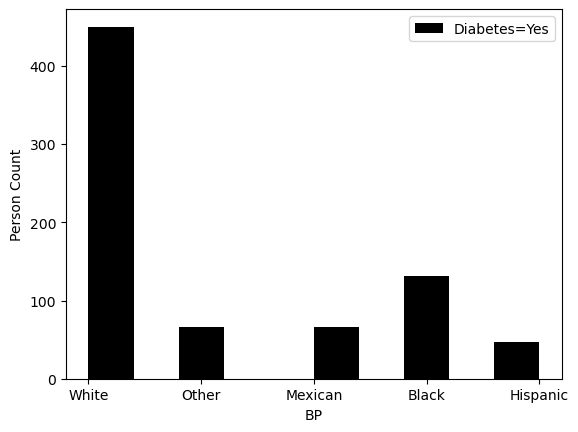

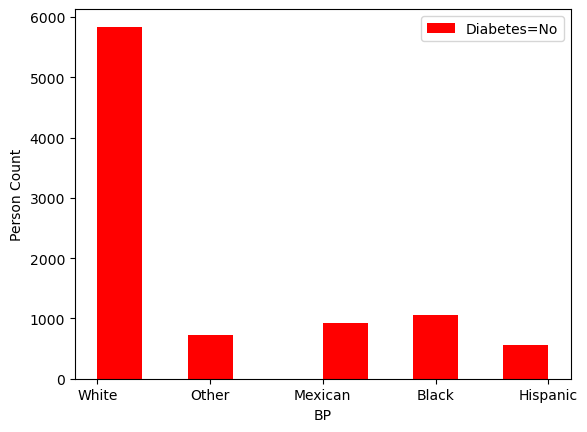

In [ ]:


YesDia = dataset_new['Diabetes'].values == 'Yes'
NoDia = dataset_new['Diabetes'].values == 'No'
YesDia=dataset_new[YesDia]
NoDia=dataset_new[NoDia]
 
Race1 = YesDia['Race1'].tolist()
Race0 = NoDia['Race1'].tolist()

plt.hist([Race1], color=[
         'Black'], label=['Diabetes=Yes'])
plt.xlabel('BP')
plt.ylabel('Person Count')
plt.legend()
plt.show()

plt.hist([Race0], color=[
         'Red'], label=['Diabetes=No'])
plt.xlabel('BP')
plt.ylabel('Person Count')
plt.legend()
plt.show()

Is this person physically active?

<Axes: xlabel='SmokeNow', ylabel='count'>

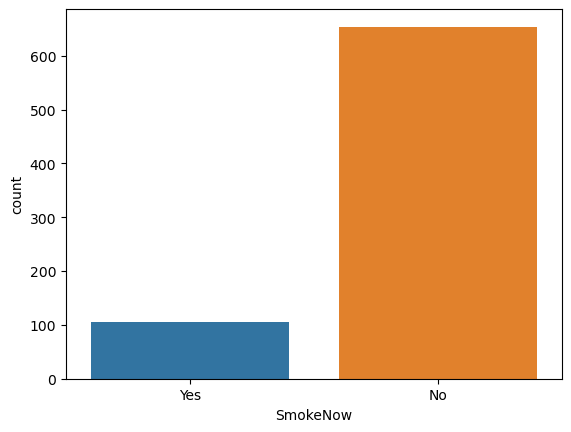

In [ ]:
sns.countplot(x = 'SmokeNow',data = YesDia)


<Axes: xlabel='SmokeNow', ylabel='count'>

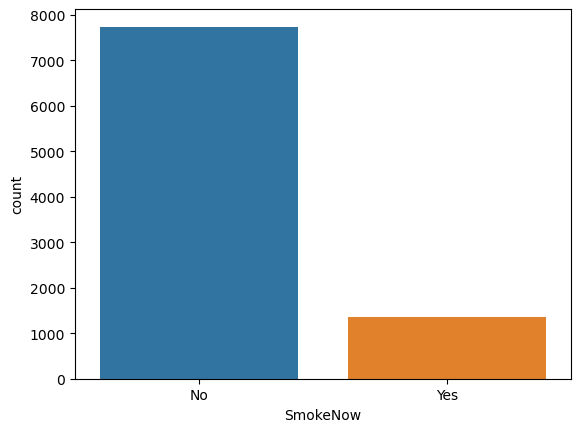

In [ ]:
sns.countplot(x = 'SmokeNow',data = NoDia)

**Lineplot**

<Axes: xlabel='TotChol', ylabel='Diabetes'>

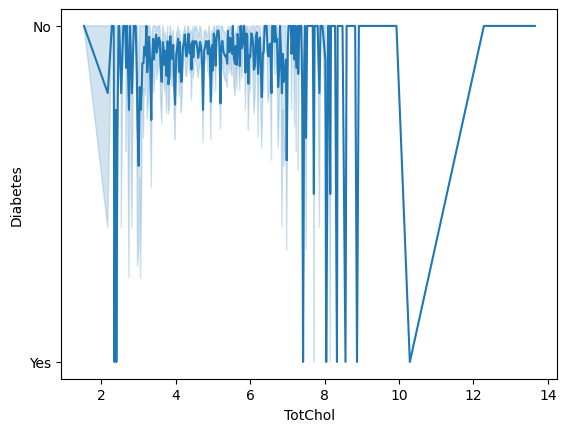

In [ ]:
sns.lineplot(x="TotChol", y="Diabetes", data=dataset_new)

**Scatter matrix**

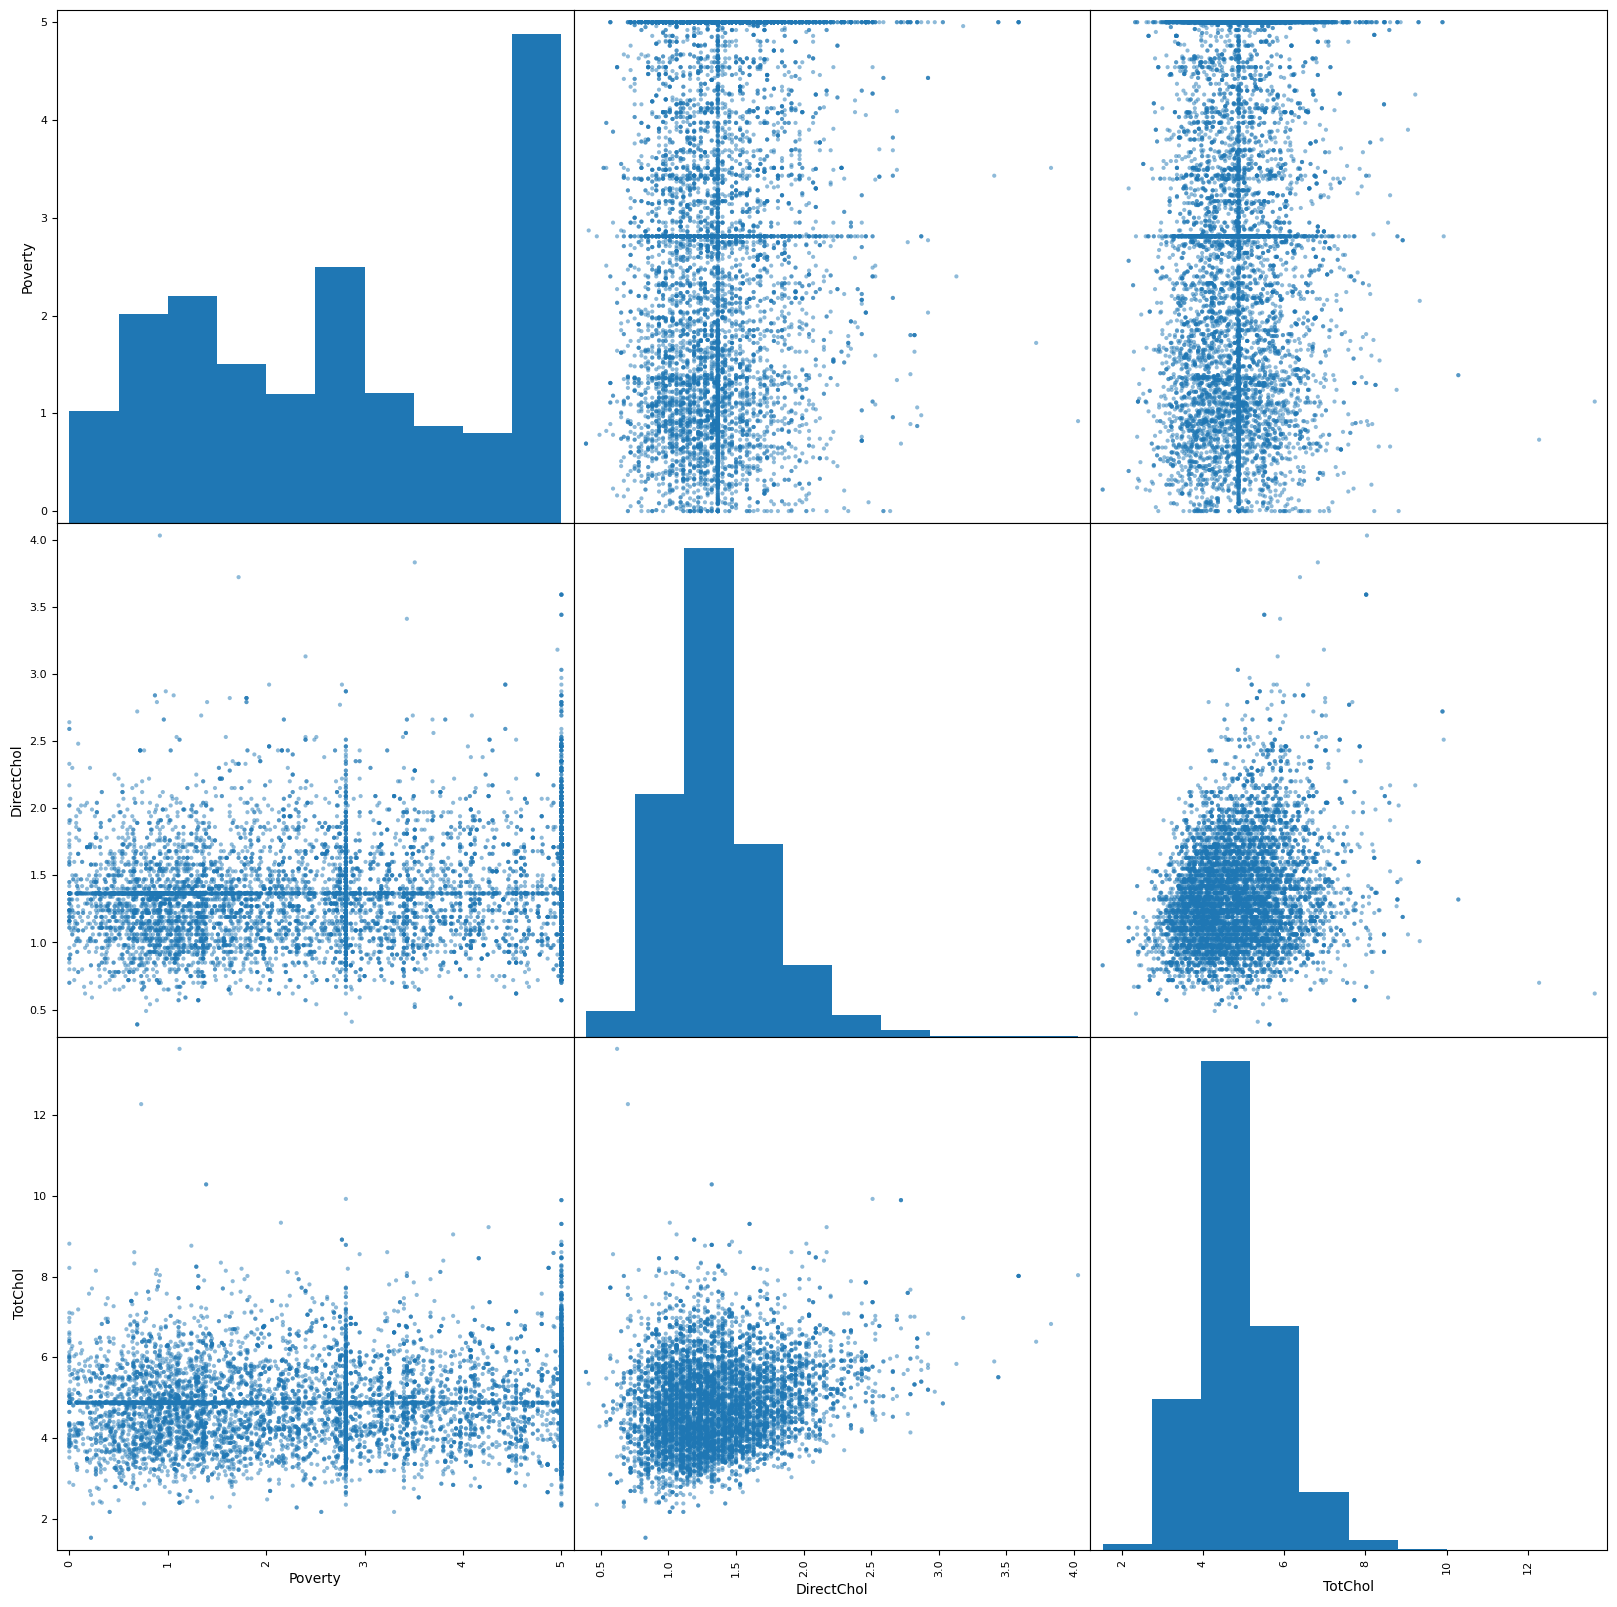

In [ ]:

from pandas.plotting import scatter_matrix

scatter_matrix(dataset , figsize=(20, 20))
plt.show()

**Pair plot**

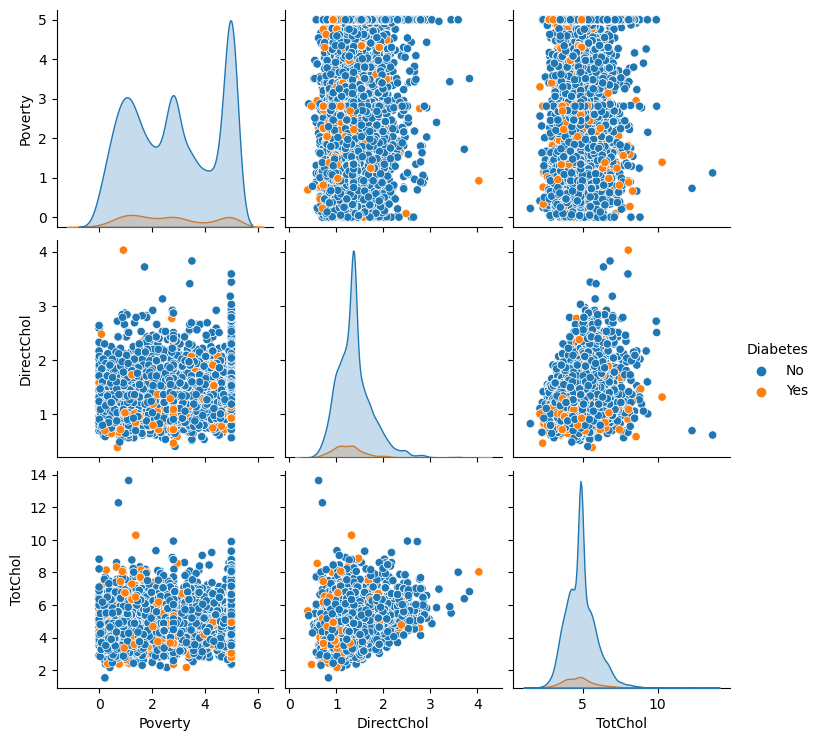

In [ ]:
sns.pairplot(data = dataset, hue = 'Diabetes')
plt.show()

**Plot correlation matrix (Clustermap)**

In [ ]:
#Converting dataset_new into a panda dataframe
df = dataset_new

corr = df.corr()

 #Displaying dataframe of correlation values
corr.style.background_gradient(cmap ='coolwarm')

,Poverty,DirectChol,TotChol
Poverty,1.000000,0.114370,0.078125
DirectChol,0.114370,1.000000,0.221467
TotChol,0.078125,0.221467,1.000000


Distribution plot:

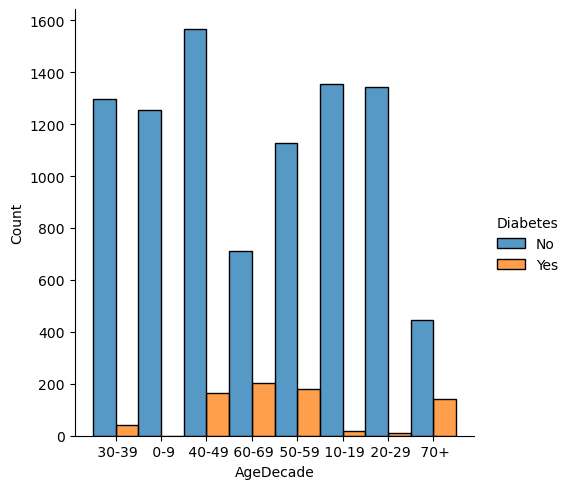

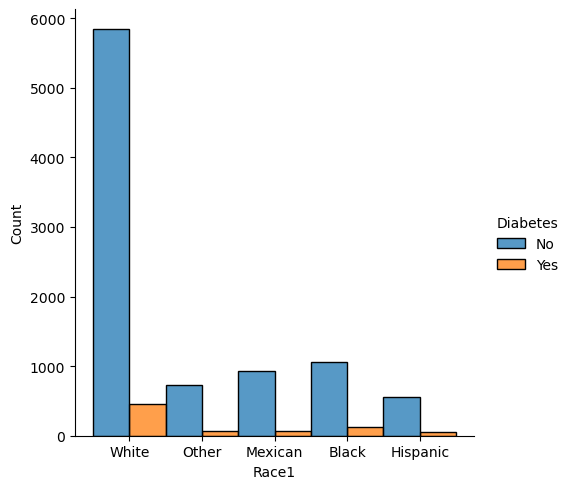

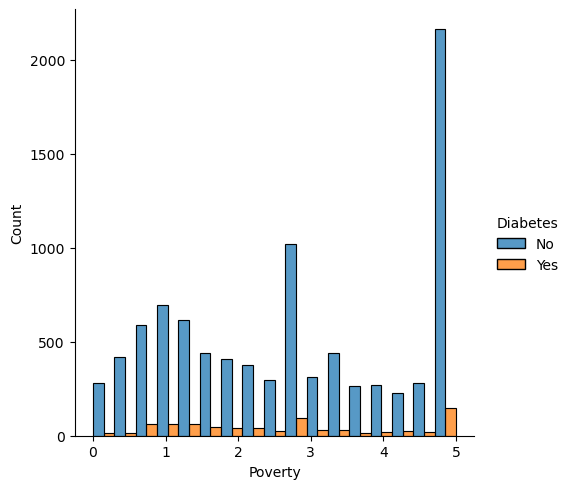

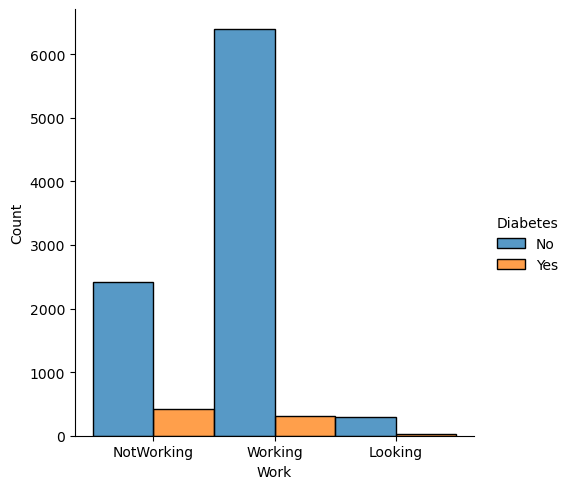

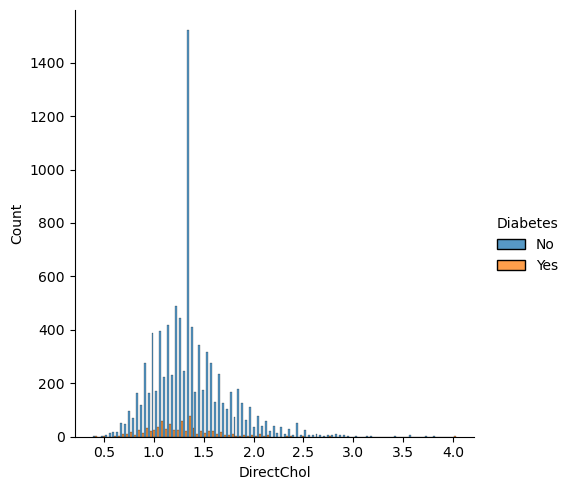

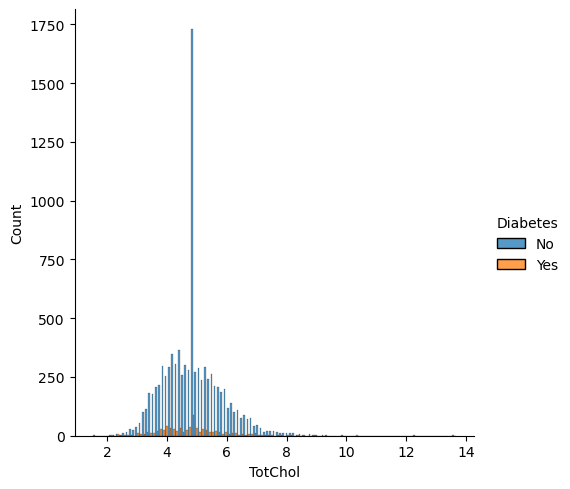

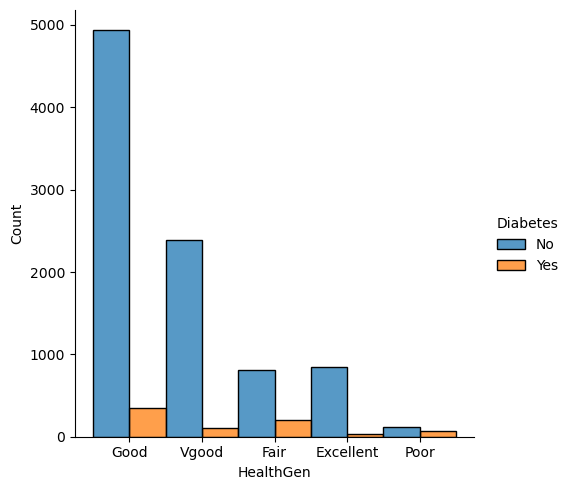

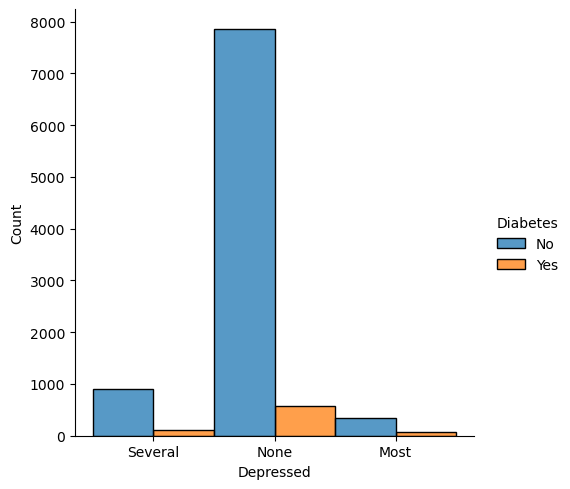

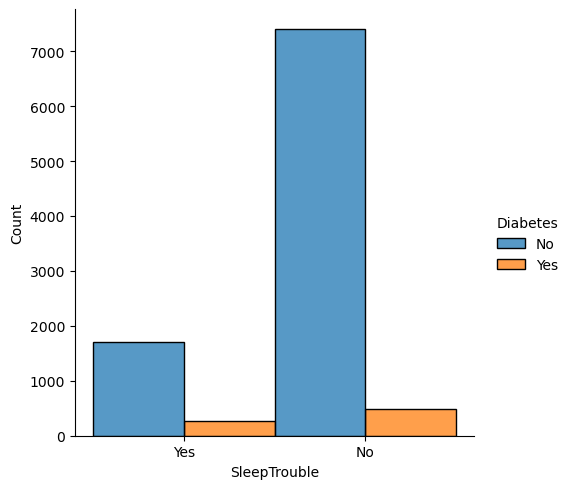

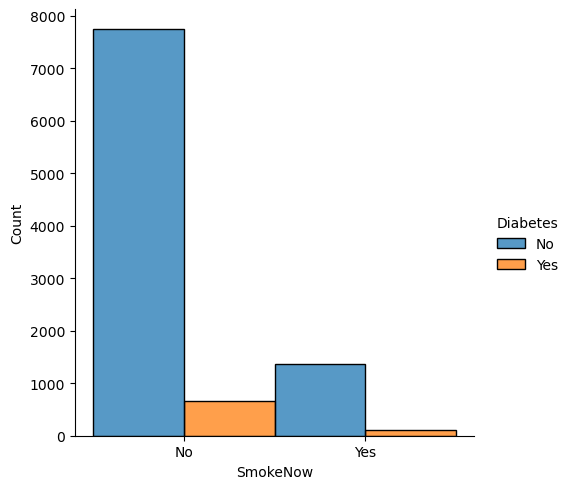

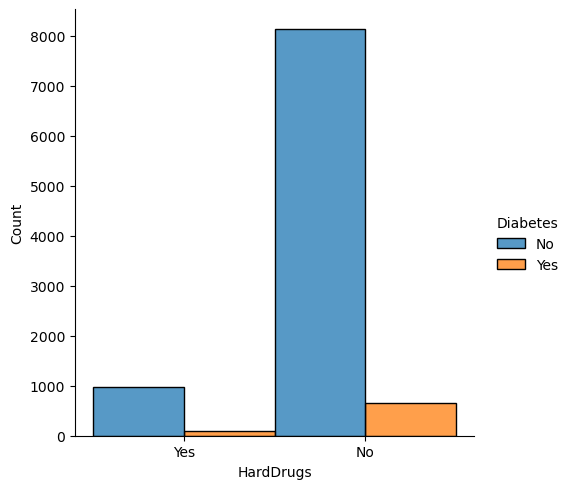

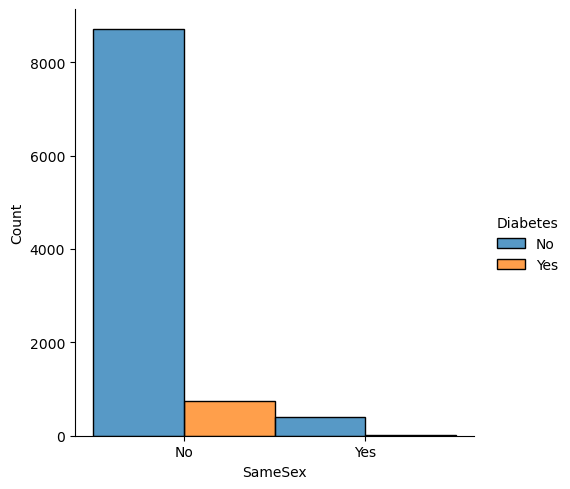

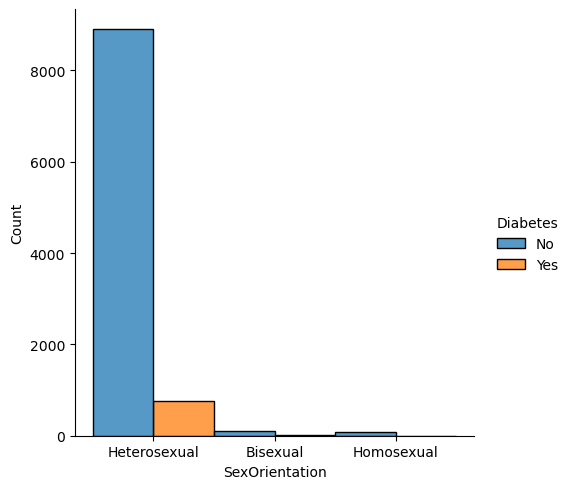

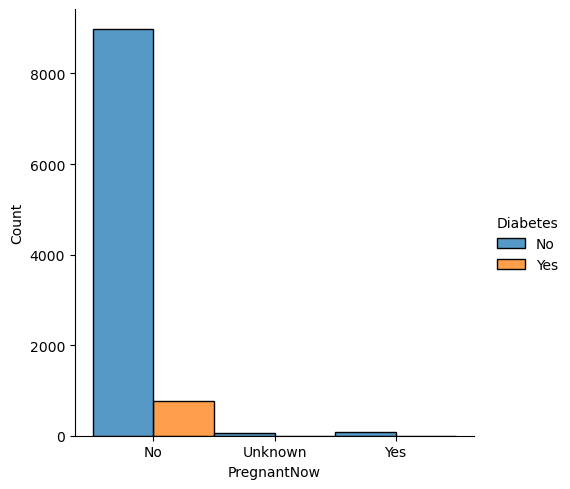

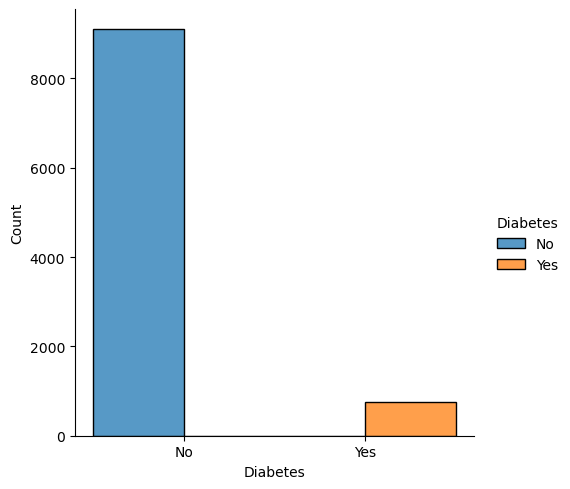

In [ ]:
for i in df.columns:
    sns.displot(df, x=i,multiple="dodge",hue="Diabetes")
    

Did you not see a particular problem in the previous charts?
It seems that the data is not properly distributed for our desired variable. For this, we use the SMOTE method for resampling to solve this problem.

# Algorithms

Here we process and standardize the data so that we can finally build different models with them.

To use the smote method, it is necessary to convert our string data into numeric variables. Note that after the feature selection section, we created a new dataset from it.

In [ ]:

categorical_features4 = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for var in categorical_features4:
    df[var] = le.fit_transform(df[var])
df3 = df



#string_columns = df3.select_dtypes(include='object').columns
# Convert string columns to dummy variables
#df3 = pd.get_dummies(df3, columns=string_columns, drop_first=True)

print(df3.columns)
dataset_new=df3.copy()

Index(['AgeDecade', 'Race1', 'Poverty', 'Work', 'DirectChol', 'TotChol',
       'HealthGen', 'Depressed', 'SleepTrouble', 'SmokeNow', 'HardDrugs',
       'SameSex', 'SexOrientation', 'PregnantNow', 'Diabetes'],
      dtype='object')


Now we see the result:

Distribution plot:

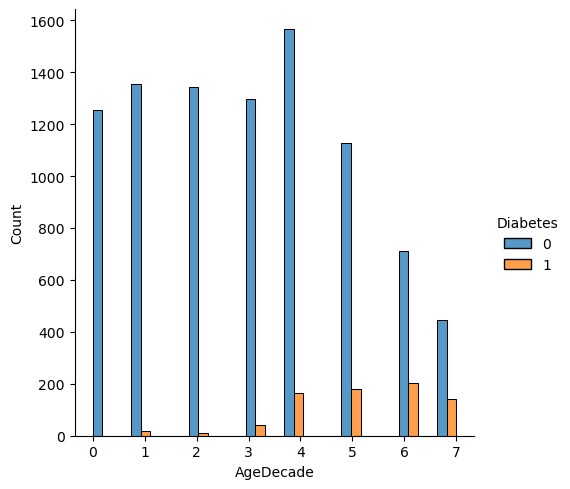

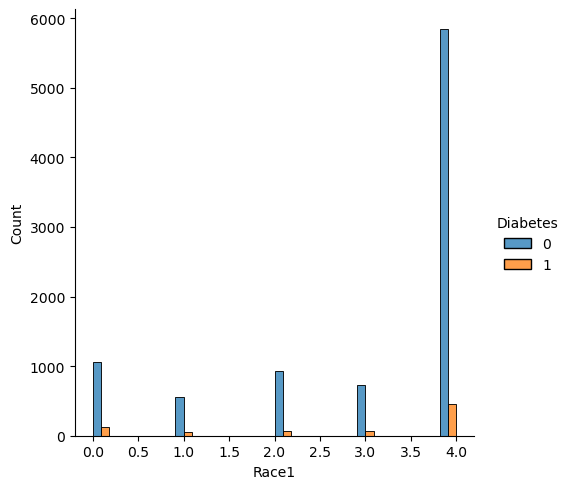

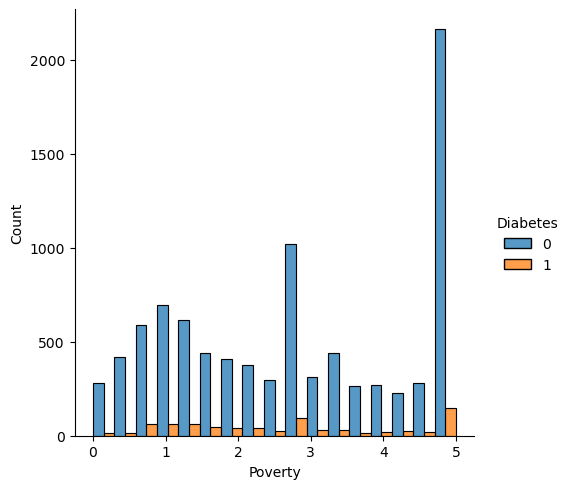

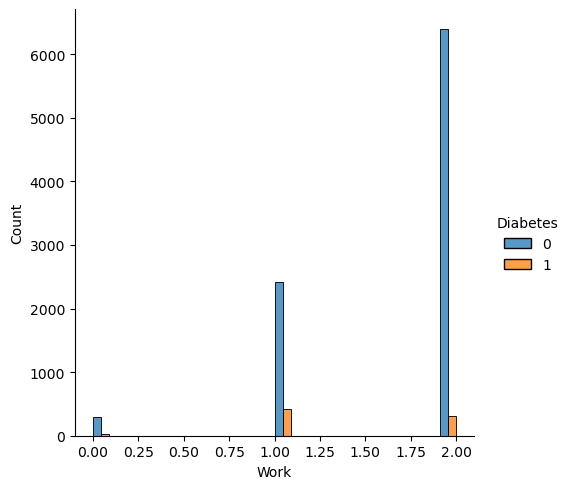

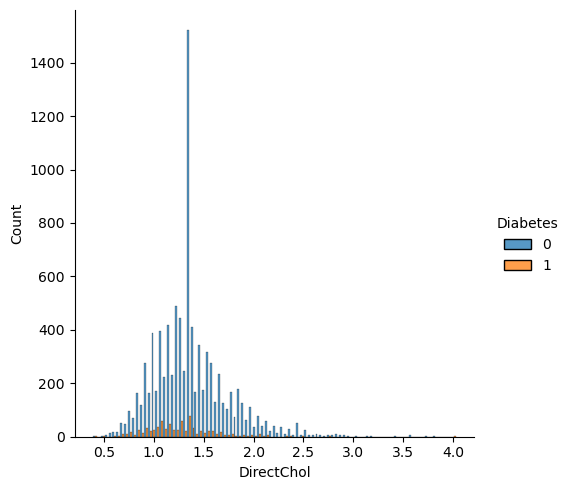

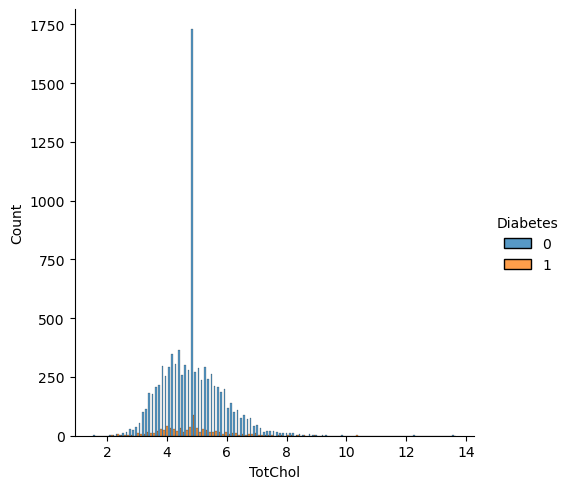

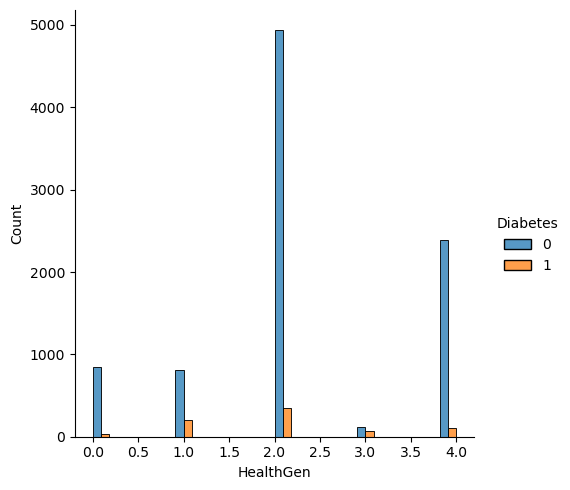

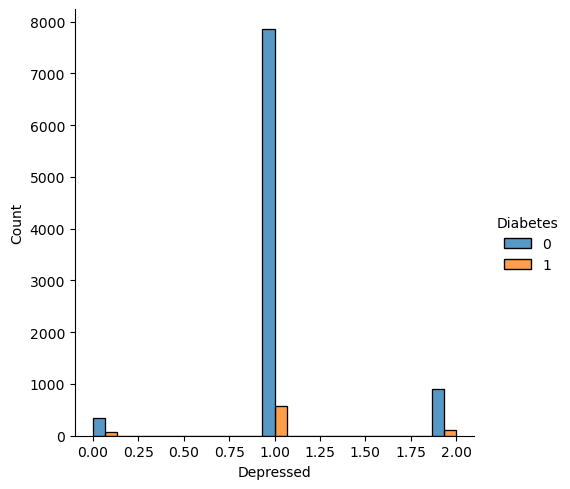

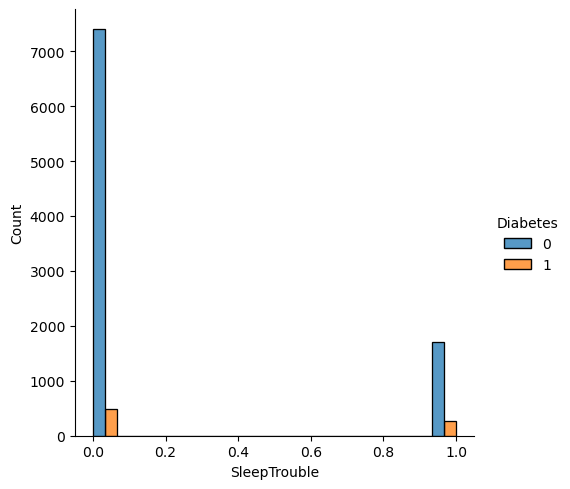

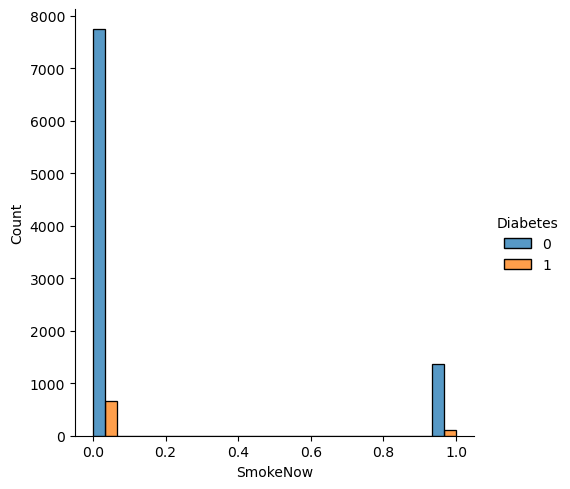

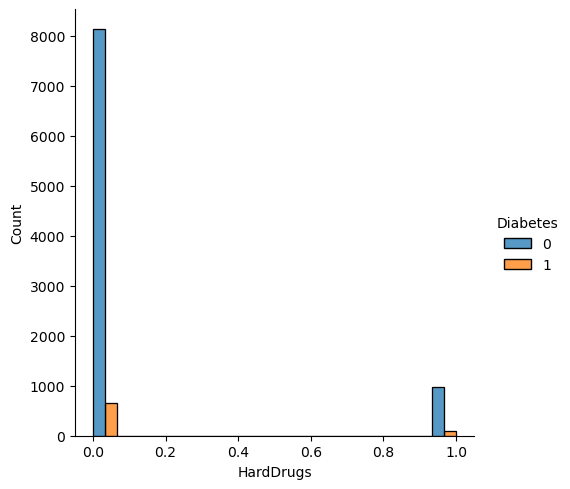

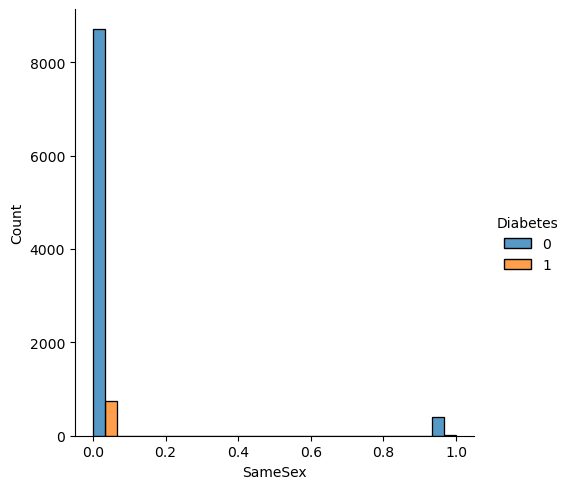

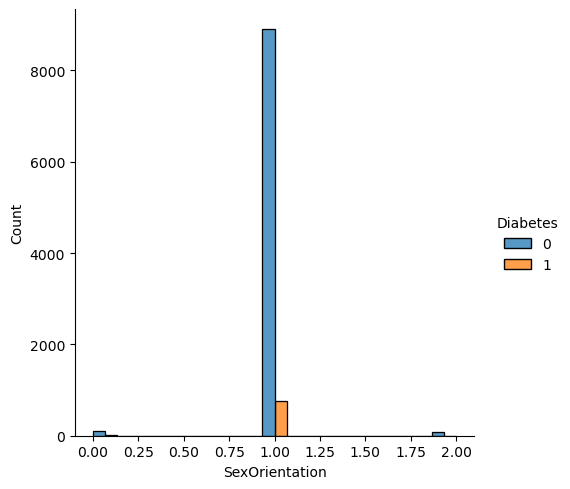

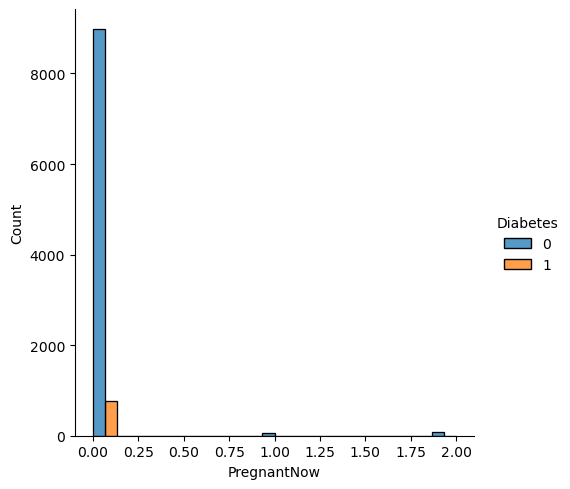

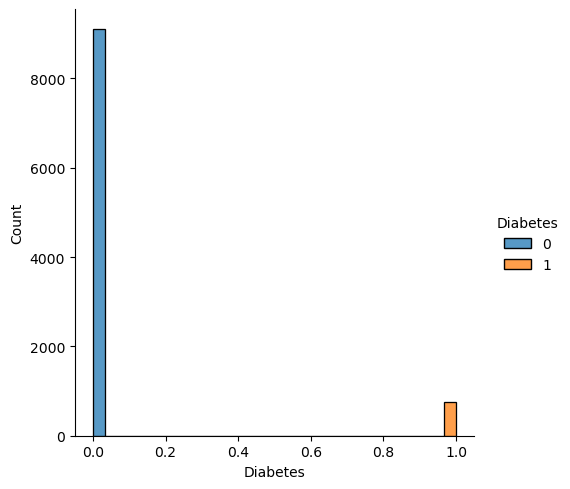

In [ ]:
for i in df3.columns:
    sns.displot(df3, x=i,multiple="dodge",hue="Diabetes")
    

In [ ]:
dataset_new.head()
#dataset_new.to_csv('New.csv')

,AgeDecade,Race1,Poverty,Work,DirectChol,TotChol,HealthGen,Depressed,SleepTrouble,SmokeNow,HardDrugs,SameSex,SexOrientation,PregnantNow,Diabetes
0,3,4,1.36,1,1.290000,3.490000,2,2,1,0,1,0,1,0,0
1,3,4,1.36,1,1.290000,3.490000,2,2,1,0,1,0,1,0,0
2,3,4,1.36,1,1.290000,3.490000,2,2,1,0,1,0,1,0,0
3,0,3,1.07,2,1.365029,4.878875,2,1,0,0,0,0,1,0,0
4,4,4,1.91,1,1.160000,6.700000,2,2,1,1,1,1,1,0,0


**Preprocessing & Data Spliting**

The data should be resampled with the SMOTE method to have a proper distribution.
Then we will see the resampled samples.

In [ ]:
# Selecting X & Y
X1 = dataset_new.drop('Diabetes', axis=1)
Y1 = dataset_new['Diabetes']

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X1, Y1)

# Concatenate resampled features 
#data_resampled = pd.concat([X_resampled, y_resampled], axis=1)
dataset9=copy.deepcopy(pd.concat([X_resampled, y_resampled], axis=1))

X1 = dataset9.iloc[:, :-1].values
Y1 = dataset9.iloc[:, -1].values

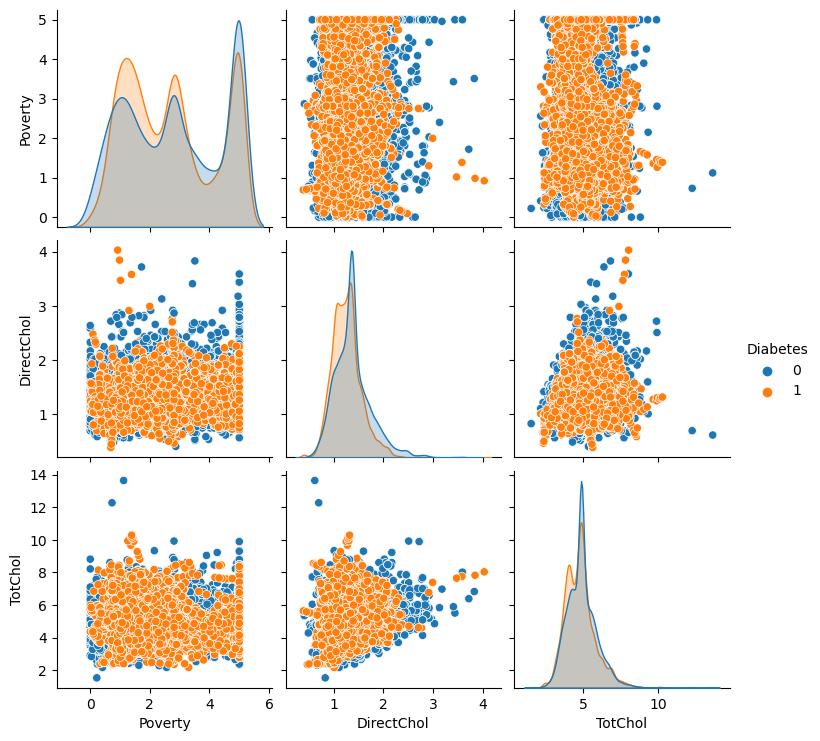

In [ ]:
columns_to_include = ['Poverty', 'DirectChol', 'TotChol','Diabetes']
subset_data = dataset9[columns_to_include]
sns.pairplot(data = subset_data, hue = 'Diabetes')
plt.show()

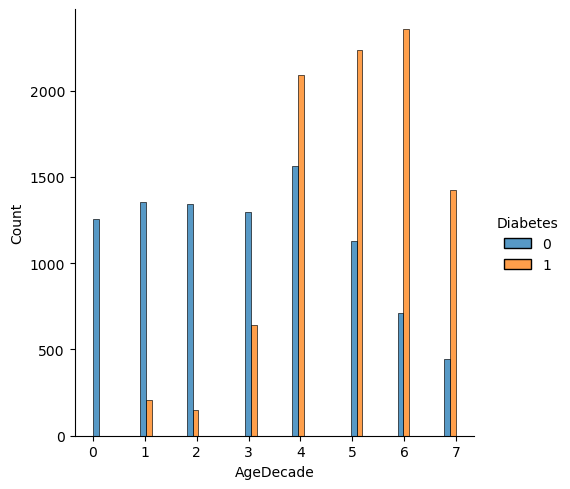

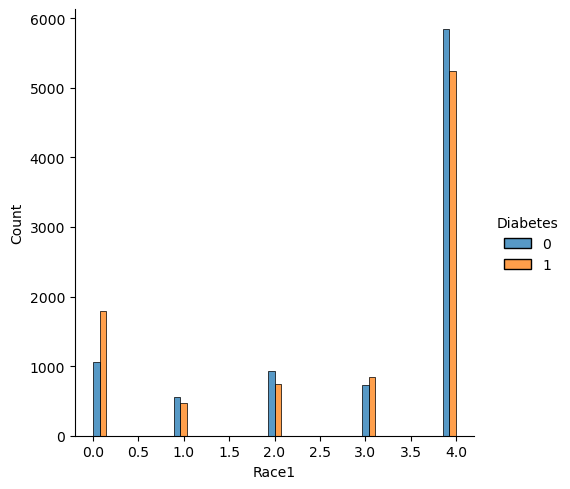

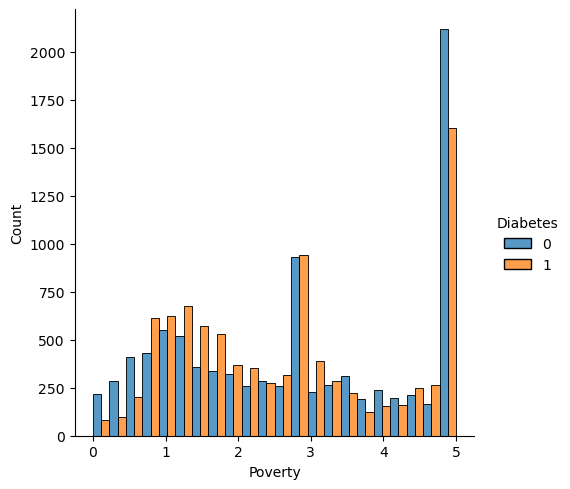

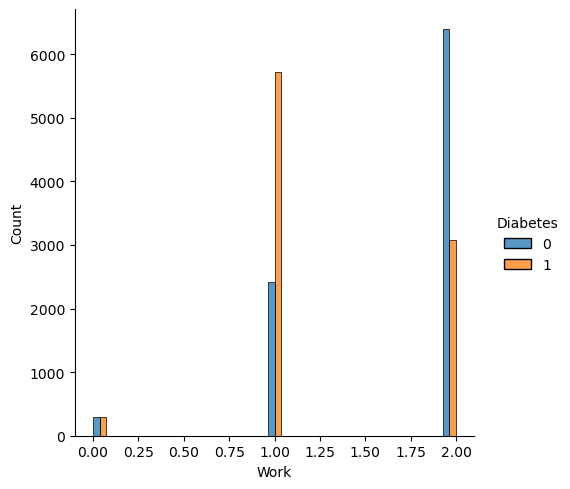

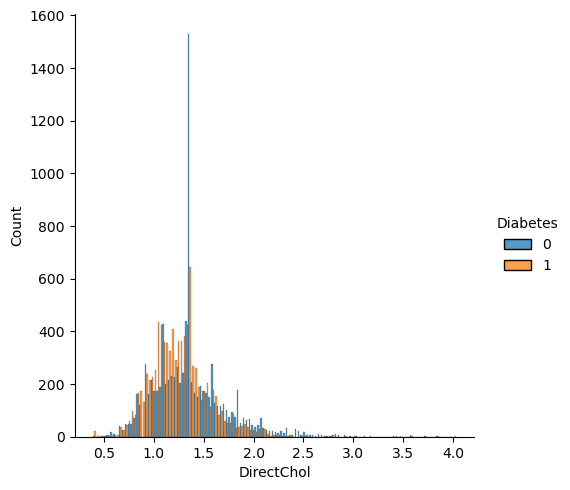

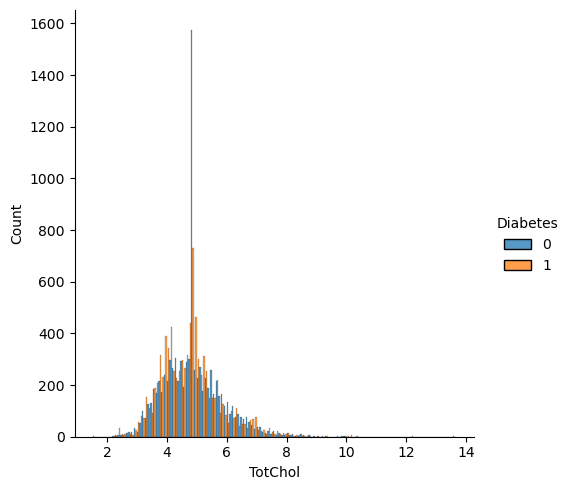

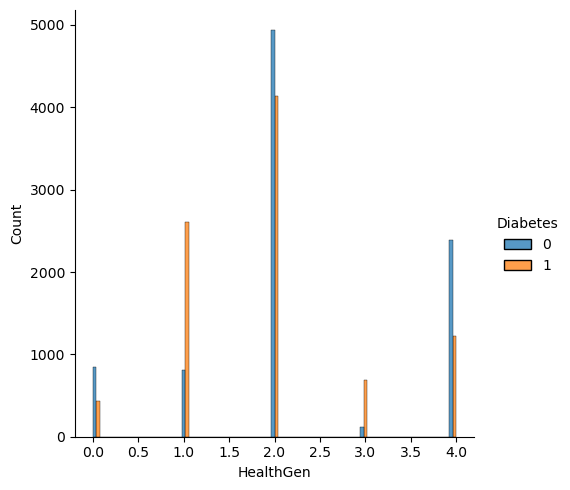

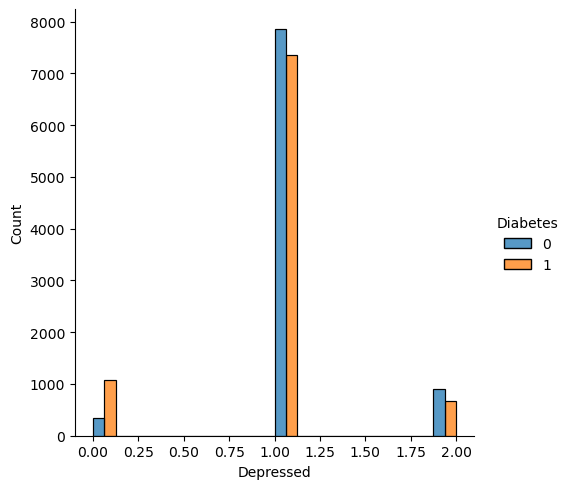

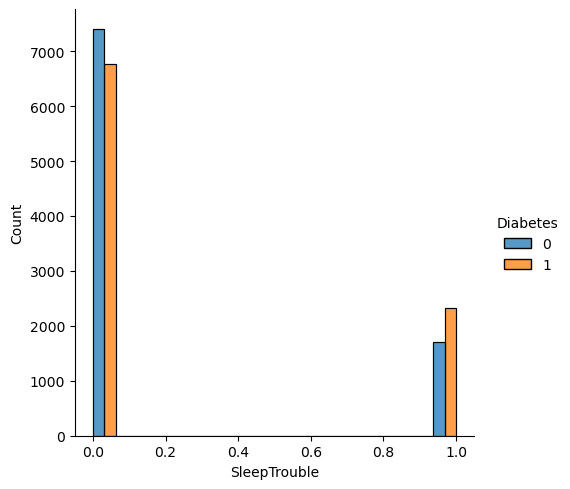

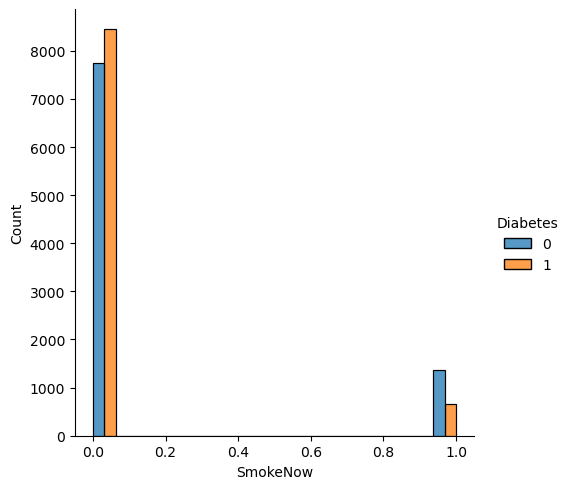

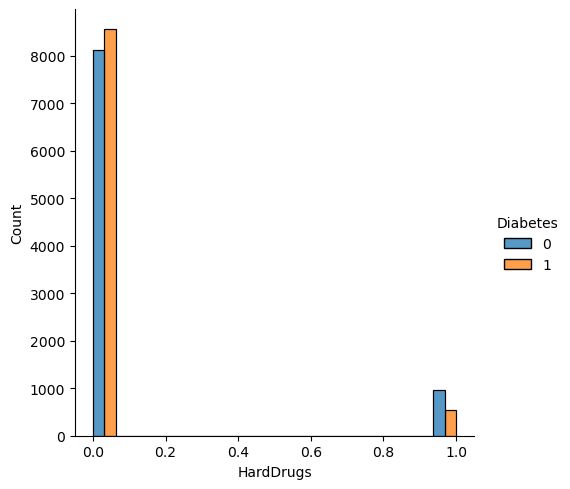

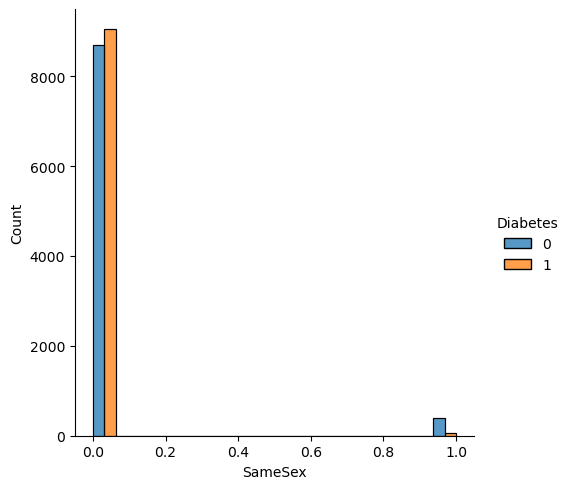

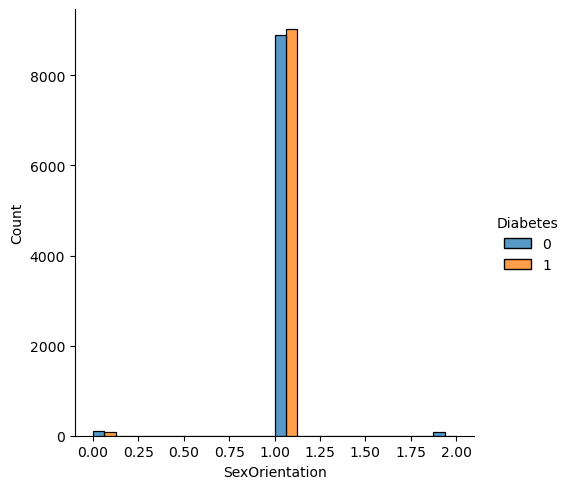

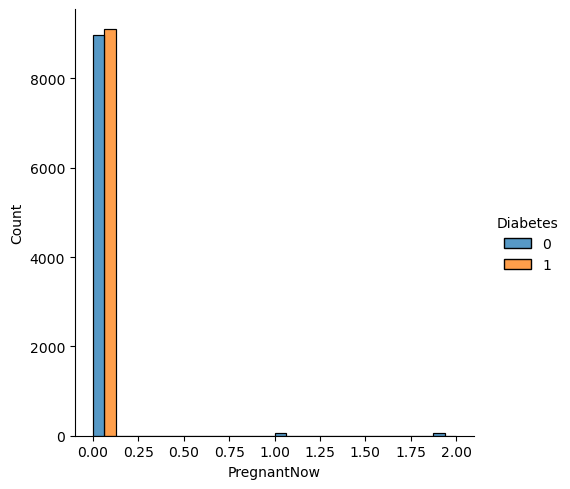

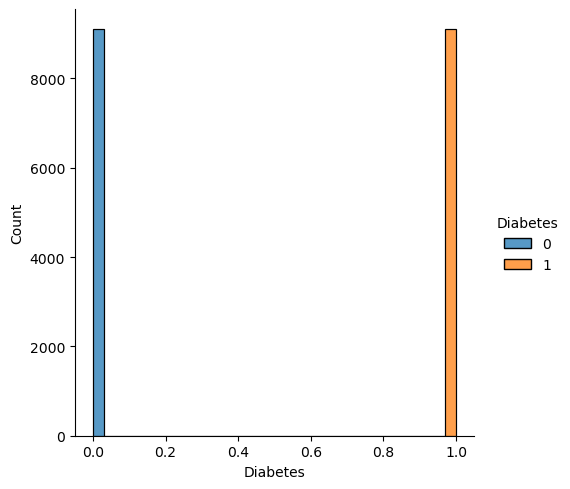

In [ ]:
for i in dataset9.columns:
    sns.displot(dataset9, x=i,multiple="dodge",hue="Diabetes")
    

# Modeling

We do not use cross-validation to draw the confiscation matrix and separate the training and test data in the normal way.

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X1,Y1, test_size = 0.25, random_state = 0)


This step was the last step of data preprocessing. Now we can inject our data into machine learning algorithms.

In [ ]:
# Checking dimensions
print("XTrain shape:", XTrain.shape)
print("XTest shape:", XTest.shape)
print("YTrain shape:", YTrain.shape)
print("YTest shape:", YTest.shape)

XTrain shape: (13647, 14)
XTest shape: (4549, 14)
YTrain shape: (13647,)
YTest shape: (4549,)


Most machine learning algorithms use Euclidean distance for their estimates. For this reason, if some samples have too much or too little value, the accuracy of the modeling will decrease. Data scaling is used to solve this problem.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

XTrain = sc.fit_transform(X1)
XTest = sc.transform(X1)

**Cross validator**
.
.
.
.


We write two functions that calculate the amount of acc and auc for us and enter it into a list.

* ACC

In [ ]:
#Importing required libraries
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

def Kfold_modulation(input_model):

    #Implementing cross validation
    k_list = [2,5,10]
    avg_acc_list =[]

    for k in k_list:
        acc_scores = []
        kf = RepeatedKFold(n_splits=k, n_repeats=20, random_state=None)
        #kf = KFold(n_splits=k,shuffle=False, random_state=None)

        for train_indexes, test_indexes in kf.split(X1):
            X_train, X_test = X1[train_indexes], X1[test_indexes]
            y_train, y_test = Y1[train_indexes], Y1[test_indexes]

            
            # Apply feature scaling
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = sc.transform(X_test)

            model = input_model 
            model.fit(X_train, y_train) 
            y_pred = model.predict(X_test) 

            acc_score = accuracy_score(y_test, y_pred)  
            acc_scores.append(acc_score)

        avg_acc = np.mean(acc_scores)
        avg_acc_list.append(avg_acc)
    return avg_acc_list 


* AUC 

In [ ]:
def Kfold_modulation2(input_model):
    # Create StandardScaler object
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X1)  # Scale the input features

    # Implementing cross validation
    k_list = [2, 5, 10]
    num_repeats = 20
    auc_list = []

    for k in k_list:
        kf = RepeatedKFold(n_splits=k, n_repeats=num_repeats)

        mean_score = cross_val_score(input_model, X_scaled, Y1, scoring="roc_auc", cv=kf).mean()

        auc_list.append(mean_score)

    return auc_list

We create random tree forest model:

**Random forest**

In [28]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor_acc=Kfold_modulation(ranfor)
ranfor_auc=Kfold_modulation2(ranfor)

'\n'

In [ ]:
#The ranfor_pred value is later used to draw the confusion matrix.
XTrain, XTest, YTrain, YTest = train_test_split(X1,Y1, test_size = 0.25, random_state = 0)
ranfor2 = RandomForestClassifier()
ranfor2.fit(XTrain, YTrain)
ranfor2_pred=ranfor2.predict(XTest)


Decision Trees

In [ ]:
# Decision Trees Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DecTree = DecisionTreeClassifier()
DecTree_acc=Kfold_modulation(DecTree)
DecTree_auc=Kfold_modulation2(DecTree)

#This part of the code was commented because it was time-consuming to draw the created tree for us.
'''
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(DecTree,max_depth=3 ,  filled=True)
tree.plot_tree(DecTree, fontsize=12,max_depth=4, ax=plt.subplots(figsize=(10,10)) )
'''

[0.8889508683227083, 0.912802117777798, 0.9240107956913894]
[0.9085597043557048, 0.9326233282277286, 0.9390170120913797]


'\nfig = plt.figure(figsize=(250,200))\n_ = tree.plot_tree(DecTree,max_depth=3 ,  filled=True)\ntree.plot_tree(DecTree, fontsize=12,max_depth=4, ax=plt.subplots(figsize=(10,10)) )\n'

AdaBoost:

In [ ]:
#  AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost_acc=Kfold_modulation(AdaBoost)
AdaBoost_auc=Kfold_modulation2(AdaBoost)

Naive Bayes:

In [ ]:
# Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb_acc=Kfold_modulation(nb)
nb_auc=Kfold_modulation2(nb)

[0.50878214992306, 0.505295324008226, 0.5031267844305227]
[0.8358114514579768, 0.8359008498363356, 0.8359441911665126]


# Show Scoring

In this section, we must evaluate how reliable our models and measure the error rate of the Predictors (by K-Folds):

In [ ]:
acc_list0=[ranfor_acc,DecTree_acc,AdaBoost_acc,nb_acc]
acc_list=[]
for i in acc_list0 :
    my_formatted_list = [ '%.4f' % elem for elem in i ]
    list=[]
    #for i in my_formatted_list:
        #list.append(int(float(i)*100))
    acc_list.append(my_formatted_list)

    
'''
print("Random Forest: " + str(acc_list[1]))
print("DecisionTree: " + str(acc_list[2]))
print("AdaBoost: " + str(acc_list[3]))
print("Naive Bayes: " + str(acc_list[4]))
'''


auc_list0=[ranfor_auc,DecTree_auc,AdaBoost_auc,nb_auc]
auc_list=[]
for i in auc_list0 :
    my_formatted_list = [ '%.4f' % elem for elem in i ]
    list=[]
    auc_list.append(my_formatted_list)

print(auc_list)


[['0.9894', '0.9943', '0.9953'], ['0.9086', '0.9326', '0.9390'], ['0.8918', '0.8923', '0.8922'], ['0.8358', '0.8359', '0.8359']]


Creating ACC and AUC values for diffrent algorithms:

In [ ]:
bar=pd.DataFrame([acc_list[0],acc_list[1],acc_list[2],acc_list[3]])
bar['algo'] = ['RF','DT','AB','NB']
#bar.insert()=['ranfor_acc','DecTree_acc','AdaBoost_acc','nb_acc']
bar.columns=['K2' , 'K5' , 'K10','Algorithm']

bar['K2']=bar['K2'].astype('float64')*100
bar['K5']=bar['K5'].astype('float64')*100
bar['K10']=bar['K10'].astype('float64')*100

print('ACC','\n',bar,'\n')



barauc=pd.DataFrame([auc_list[0],auc_list[1],auc_list[2],auc_list[3]])
barauc['algo'] = ['RF','DT','AB','NB']
#barauc.insert()=['ranfor_auc','DecTree_auc','AdaBoost_auc','nb_auc']
barauc.columns=['K2' , 'K5' , 'K10','Algorithm']
barauc['K2']=barauc['K2'].astype('float64')*100
barauc['K5']=barauc['K5'].astype('float64')*100
barauc['K10']=barauc['K10'].astype('float64')*100
print('\n','AUC','\n',barauc)

ACC 
       K2     K5    K10 Algorithm
0  94.48  96.15  96.53        RF
1  88.90  91.28  92.40        DT
2  80.01  80.02  80.01        AB
3  50.88  50.53  50.31        NB 


 AUC 
       K2     K5    K10 Algorithm
0  98.94  99.43  99.53        RF
1  90.86  93.26  93.90        DT
2  89.18  89.23  89.22        AB
3  83.58  83.59  83.59        NB


Drawing ACC and AUC graphs for different algorithms:

<Axes: title={'center': 'AUC'}, xlabel='Algorithm'>

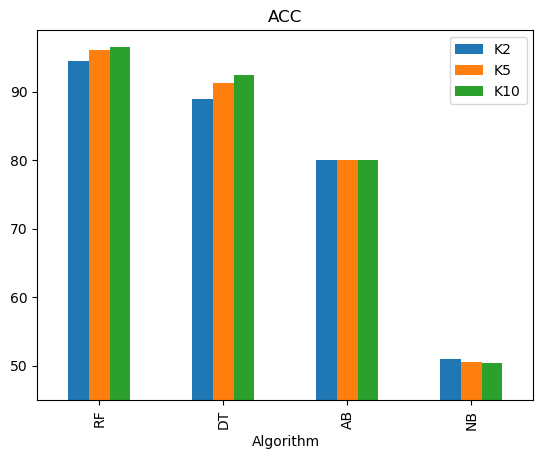

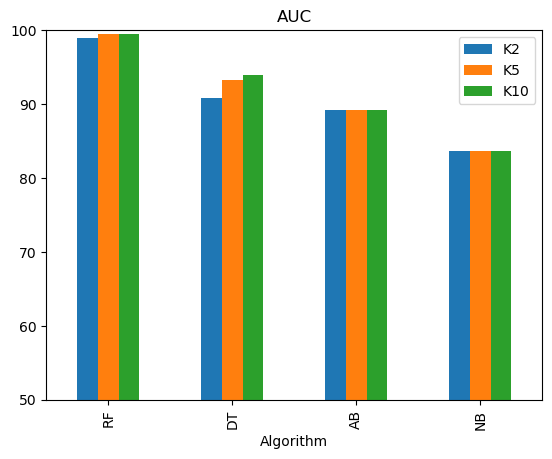

In [ ]:
 
# create data

# view data

bar['K2'] = bar['K2'].astype('float64') 
bar['K5'] = bar['K5'].astype('float64') 
bar['K10'] = bar['K10'].astype('float64') 
# plot grouped bar chart
bar.plot(x='Algorithm',
        kind='bar',
        stacked=False,
        ylim=[45, 99],
        title='ACC')

barauc['K2'] = barauc['K2'].astype('float64') 
barauc['K5'] = barauc['K5'].astype('float64') 
barauc['K10'] = barauc['K10'].astype('float64') 
# plot grouped bar chart
barauc.plot(x='Algorithm',
        kind='bar',
        stacked=False,
        ylim=[50, 100],
        title='AUC')

Drawing ROC diagram for different folds:

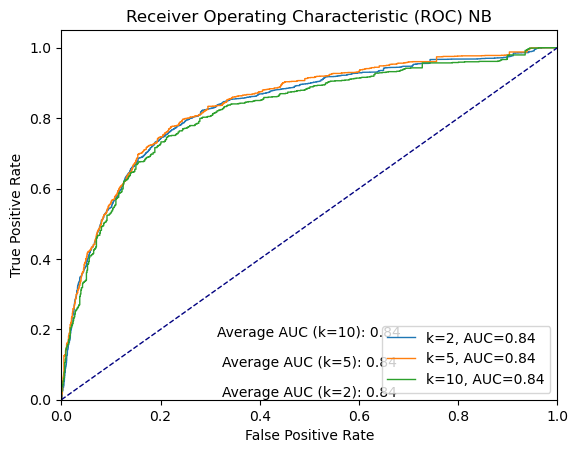

In [ ]:


from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RepeatedKFold


# Define the repeated k-fold cross-validation parameters
n_folds = [2, 5, 10]
n_repeats = 20

# Define the classifier
clf = nb
sc = StandardScaler()

# Initialize the mean AUC list for each k
mean_auc_list = []

# Perform repeated k-fold cross-validation for each k
for n_fold in n_folds:
    auc_list = []
    rskf = RepeatedKFold(n_splits=n_fold, n_repeats=n_repeats)
    #rskf = KFold(n_splits=n_fold,shuffle=False, random_state=None)

    # Perform cross-validation
    for train_index, test_index in rskf.split(X1, Y1):
        X_train, X_test = X1[train_index], X1[test_index]
        Y_train, Y_test = Y1[train_index], Y1[test_index]

        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        clf.fit(X_train, Y_train)
        Y_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, Y_prob)
        auc_val = auc(fpr, tpr)
        auc_list.append(auc_val)

    # Calculate the mean AUC and update mean AUC list
    mean_auc = np.mean(auc_list)
    mean_auc_list.append(mean_auc)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=1, label=f'k={n_fold}, AUC={mean_auc:.2f}')

# Set plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) NB')
plt.legend(loc="lower right")

# Display average AUC values
plt.text(0.5, 0.02, f'Average AUC (k=2): {mean_auc_list[0]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.text(0.5, 0.1, f'Average AUC (k=5): {mean_auc_list[1]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.text(0.5, 0.18, f'Average AUC (k=10): {mean_auc_list[2]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.show()

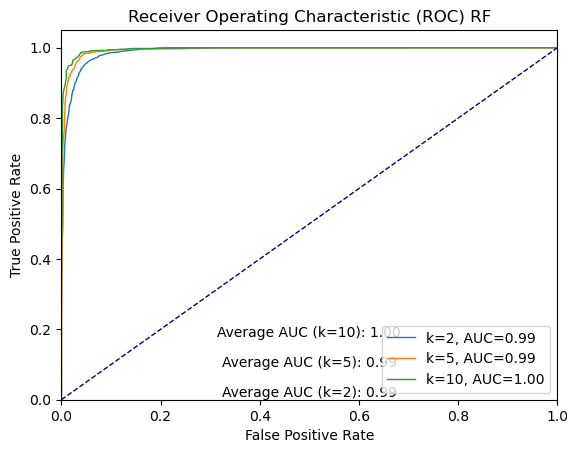

In [ ]:


from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RepeatedKFold


# Define the repeated k-fold cross-validation parameters
n_folds = [2, 5, 10]
n_repeats = 20

# Define the classifier
clf = ranfor
sc = StandardScaler()

# Initialize the mean AUC list for each k
mean_auc_list = []

# Perform repeated k-fold cross-validation for each k
for n_fold in n_folds:
    auc_list = []
    rskf = RepeatedKFold(n_splits=n_fold, n_repeats=n_repeats)
    #rskf = KFold(n_splits=n_fold,shuffle=False, random_state=None)

    # Perform cross-validation
    for train_index, test_index in rskf.split(X1, Y1):
        X_train, X_test = X1[train_index], X1[test_index]
        Y_train, Y_test = Y1[train_index], Y1[test_index]
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        
        clf.fit(X_train, Y_train)
        Y_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, Y_prob)
        auc_val = auc(fpr, tpr)
        auc_list.append(auc_val)

    # Calculate the mean AUC and update mean AUC list
    mean_auc = np.mean(auc_list)
    mean_auc_list.append(mean_auc)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=1, label=f'k={n_fold}, AUC={mean_auc:.2f}')

# Set plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) RF')
plt.legend(loc="lower right")

# Display average AUC values
plt.text(0.5, 0.02, f'Average AUC (k=2): {mean_auc_list[0]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.text(0.5, 0.1, f'Average AUC (k=5): {mean_auc_list[1]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.text(0.5, 0.18, f'Average AUC (k=10): {mean_auc_list[2]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.show()

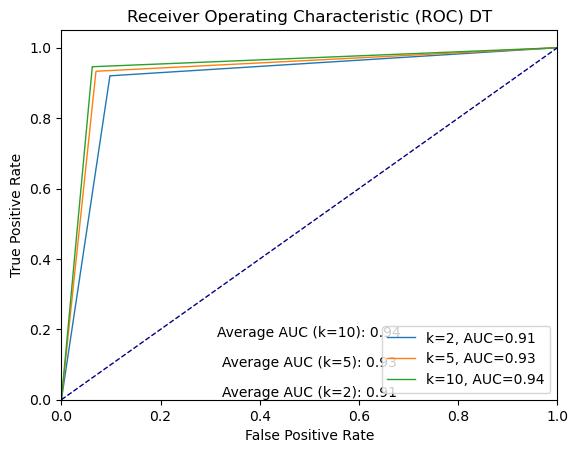

In [ ]:


from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RepeatedKFold


# Define the repeated k-fold cross-validation parameters
n_folds = [2, 5, 10]
n_repeats = 20

# Define the classifier
clf = DecTree
sc = StandardScaler()

# Initialize the mean AUC list for each k
mean_auc_list = []

# Perform repeated k-fold cross-validation for each k
for n_fold in n_folds:
    auc_list = []
    rskf = RepeatedKFold(n_splits=n_fold, n_repeats=n_repeats)
    #rskf = KFold(n_splits=n_fold,shuffle=False, random_state=None)

    # Perform cross-validation
    for train_index, test_index in rskf.split(X1, Y1):
        X_train, X_test = X1[train_index], X1[test_index]
        Y_train, Y_test = Y1[train_index], Y1[test_index]
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        clf.fit(X_train, Y_train)
        Y_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, Y_prob)
        auc_val = auc(fpr, tpr)
        auc_list.append(auc_val)

    # Calculate the mean AUC and update mean AUC list
    mean_auc = np.mean(auc_list)
    mean_auc_list.append(mean_auc)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=1, label=f'k={n_fold}, AUC={mean_auc:.2f}')

# Set plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) DT')
plt.legend(loc="lower right")

# Display average AUC values
plt.text(0.5, 0.02, f'Average AUC (k=2): {mean_auc_list[0]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.text(0.5, 0.1, f'Average AUC (k=5): {mean_auc_list[1]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.text(0.5, 0.18, f'Average AUC (k=10): {mean_auc_list[2]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.show()

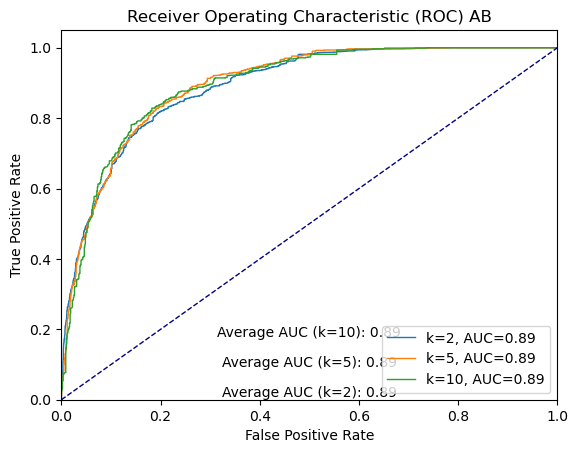

In [ ]:


from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RepeatedKFold


# Define the repeated k-fold cross-validation parameters
n_folds = [2, 5, 10]
n_repeats = 20

# Define the classifier
clf = AdaBoost
sc = StandardScaler()

# Initialize the mean AUC list for each k
mean_auc_list = []

# Perform repeated k-fold cross-validation for each k
for n_fold in n_folds:
    auc_list = []
    rskf = RepeatedKFold(n_splits=n_fold, n_repeats=n_repeats)
    #rskf = KFold(n_splits=n_fold,shuffle=False, random_state=None)

    # Perform cross-validation
    for train_index, test_index in rskf.split(X1, Y1):
        X_train, X_test = X1[train_index], X1[test_index]
        Y_train, Y_test = Y1[train_index], Y1[test_index]
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        
        clf.fit(X_train, Y_train)
        Y_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, Y_prob)
        auc_val = auc(fpr, tpr)
        auc_list.append(auc_val)

    # Calculate the mean AUC and update mean AUC list
    mean_auc = np.mean(auc_list)
    mean_auc_list.append(mean_auc)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=1, label=f'k={n_fold}, AUC={mean_auc:.2f}')

# Set plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) AB')
plt.legend(loc="lower right")

# Display average AUC values
plt.text(0.5, 0.02, f'Average AUC (k=2): {mean_auc_list[0]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.text(0.5, 0.1, f'Average AUC (k=5): {mean_auc_list[1]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.text(0.5, 0.18, f'Average AUC (k=10): {mean_auc_list[2]:.2f}', transform=plt.gca().transAxes,
         ha='center', va='center')
plt.show()

Now we draw the correlation matrix for two random tree forest and logistic regression algorithms:

[[2127  106]
 [  56 2260]]


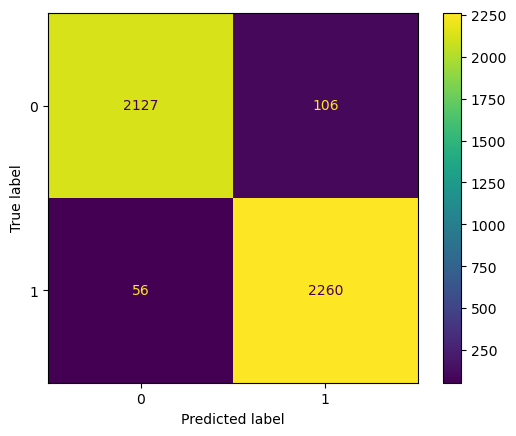

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#In the models, we put test data to make predictions for us.



YP_ranfor = ranfor2.predict(XTest)

cm = confusion_matrix(YTest, YP_ranfor, labels=None)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



Classification report (for main classification metrics) :

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(YTest, YP_ranfor))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2233
           1       0.96      0.98      0.97      2316

    accuracy                           0.96      4549
   macro avg       0.96      0.96      0.96      4549
weighted avg       0.96      0.96      0.96      4549

